In [1]:
from scipy import stats
from collections import defaultdict
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
matchups=pd.read_csv("NFLcurr.csv")
matchups.head(5)

,gameorder,date,season,game_id,away,opp_fran,away_conference,away_div,fran_id,home,home_conference,home_div
0,1,9/6/2018,2019,1ATLPHI,ATL,Falcons,NFC,South,Eagles,PHI,NFC,East
1,1,9/9/2018,2019,1PITCLE,PIT,Steelers,AFC,North,Browns,CLE,AFC,North
2,1,9/9/2018,2019,1CININD,CIN,Bengals,AFC,North,Colts,IND,AFC,South
3,1,9/9/2018,2019,1TENMIA,TEN,Titans,AFC,South,Dolphins,MIA,AFC,East
4,1,9/9/2018,2019,1SFMIN,SF,49ers,NFC,West,Vikings,MIN,NFC,North


In [5]:
matchups.rename(columns={'season': 'year_id'}, inplace=True)
matchups.head(2)

,gameorder,date,year_id,game_id,away,opp_fran,away_conference,away_div,fran_id,home,home_conference,home_div
0,1,9/6/2018,2019,1ATLPHI,ATL,Falcons,NFC,South,Eagles,PHI,NFC,East
1,1,9/9/2018,2019,1PITCLE,PIT,Steelers,AFC,North,Browns,CLE,AFC,North


In [21]:
full_df=pd.read_csv("2010nfl.csv")
full_df.head(5)

,game_id,gameorder,date_game,year_id,neutral,is_playoff,fran_id,home,away,opp_fran,elo_i,elo_n,elo_prob,home_score,away_score,result
0,1,1PITTEN,9/10/2009,2010,0,0,Steelers,PIT,TEN,Titans,1644.566,1592.943,0.661802,13,10,1.0
1,1,1NYGWSH,9/13/2009,2010,0,0,Giants,NYG,WSH,Redskins,1589.085,1495.030,0.714144,23,17,1.0
2,1,1TBDAL,9/13/2009,2010,0,0,Buccaneers,TB,DAL,Cowboys,1483.712,1536.223,0.517965,21,34,0.0
3,1,1BALKC,9/13/2009,2010,0,0,Ravens,BAL,KC,Chiefs,1613.810,1358.667,0.863290,38,24,1.0
4,1,1NODET,9/13/2009,2010,0,0,Saints,NO,DET,Lions,1517.408,1329.224,0.811141,45,27,1.0


In [22]:
full_df.rename(columns={'gameorder': '2'}, inplace=True)
full_df.head(2)

,game_id,2,date_game,year_id,neutral,is_playoff,fran_id,home,away,opp_fran,elo_i,elo_n,elo_prob,home_score,away_score,result
0,1,1PITTEN,9/10/2009,2010,0,0,Steelers,PIT,TEN,Titans,1644.566,1592.943,0.661802,13,10,1.0
1,1,1NYGWSH,9/13/2009,2010,0,0,Giants,NYG,WSH,Redskins,1589.085,1495.030,0.714144,23,17,1.0


In [23]:
full_df.rename(columns={'game_id': '1'}, inplace=True)
full_df.head(2)

,1,2,date_game,year_id,neutral,is_playoff,fran_id,home,away,opp_fran,elo_i,elo_n,elo_prob,home_score,away_score,result
0,1,1PITTEN,9/10/2009,2010,0,0,Steelers,PIT,TEN,Titans,1644.566,1592.943,0.661802,13,10,1.0
1,1,1NYGWSH,9/13/2009,2010,0,0,Giants,NYG,WSH,Redskins,1589.085,1495.030,0.714144,23,17,1.0


In [24]:
full_df.rename(columns={'1': 'gameorder'}, inplace=True)
full_df.head(2)

,gameorder,2,date_game,year_id,neutral,is_playoff,fran_id,home,away,opp_fran,elo_i,elo_n,elo_prob,home_score,away_score,result
0,1,1PITTEN,9/10/2009,2010,0,0,Steelers,PIT,TEN,Titans,1644.566,1592.943,0.661802,13,10,1.0
1,1,1NYGWSH,9/13/2009,2010,0,0,Giants,NYG,WSH,Redskins,1589.085,1495.030,0.714144,23,17,1.0


In [25]:
full_df.rename(columns={'2': 'game_id'}, inplace=True)
full_df.head(2)

,gameorder,game_id,date_game,year_id,neutral,is_playoff,fran_id,home,away,opp_fran,elo_i,elo_n,elo_prob,home_score,away_score,result
0,1,1PITTEN,9/10/2009,2010,0,0,Steelers,PIT,TEN,Titans,1644.566,1592.943,0.661802,13,10,1.0
1,1,1NYGWSH,9/13/2009,2010,0,0,Giants,NYG,WSH,Redskins,1589.085,1495.030,0.714144,23,17,1.0


In [78]:
def silverK(MOV, elo_diff):
    K_0=20 #https://fivethirtyeight.com/features/introducing-nfl-elo-ratings/
    if MOV>0:
        multiplier=(MOV+3)**(0.75)/(7.5+0.006*(elo_diff))
    else: 
        multiplier=(-MOV+3)**(0.75)/(7.5+0.006*(-elo_diff))
    return K_0*multiplier,K_0*multiplier

def silverS(home_score, away_score):
    S_home, S_away=0,0
    if home_score>away_score:
        S_home=1
    elif away_score>home_score:
        S_away=1
    else:
        S_home, S_away=.5,.5
    return S_home,S_away

def silver_elo_update(home_score, away_score, home_rating, away_rating):
    HOME_AD=65   #https://fivethirtyeight.com/features/introducing-nfl-elo-ratings/
    home_rating+HOME_AD
    E_home = elo_prediction(home_rating, away_rating)
    E_away = 1 - E_home
    elo_diff = home_rating - away_rating
    MOV = home_score - away_score
    
    S_home, S_away = silverS(home_score, away_score)
    if S_home>0:
        K_home, K_away = silverK(MOV, elo_diff)
    else: 
        K_home, K_away = silverK(MOV, elo_diff)
    
    return K_home*(S_home-E_home), K_away*(S_away-E_away)

def elo_prediction(home_rating,away_rating):
    E_home = 1./(1+10**((away_rating - home_rating)/ (400)))
    return E_home

def score_prediction(home_rating, away_rating):
    return (home_rating - away_rating)/32

class HeadtoHeadModel(object):
    def __init__(self, events, update_function, prediction_function=None):
        self.update_function=update_function
        self.events=events
        self.ratings={}
        self.prediction_function = prediction_function
        self.predictions = []
        self.curr_season=defaultdict(lambda: self.events[0][1]['year_id'])
        
    def train(self):
        for idx, event in self.events:
            new_year=event['year_id']
            label_i=event['fran_id']
            label_j=event['opp_fran']
            if self.ratings.get(label_i,False)==False:
                self.ratings[label_i]=elo_lookup(label_i,event['gameorder'])
            if self.ratings.get(label_j,False)==False:
                self.ratings[label_j]=elo_lookup(label_j,event['gameorder'])
                
            if self.curr_season[label_i]!=new_year:
                self.curr_season[label_i]=new_year
                self.ratings[label_i]=self.ratings[label_i]*.66+1505.*.33
            elif self.curr_season[label_j]!=new_year:
                self.curr_season[label_j]=new_year
                self.ratings[label_j]=self.ratings[label_j]*.66+1505.*.33
                
            update=self.update_function(event['home_score'],event['away_score'], self.ratings[label_i], self.ratings[label_j])
            self.ratings[label_i]+=update[0]
            self.ratings[label_j]+=update[1]
                
    def power_rankings(self):
        from operator import itemgetter
        power_rankings =sorted(self.ratings.items(), key=itemgetter(1), reverse=True)
        power = []
        for i, x in enumerate(power_rankings):
            power.append((i+1, x))
        return power
    
STARTING_LOC=0
def elo_lookup(fran_id,gameorder):
    return full_df[(full_df['fran_id']==fran_id)&(full_df['gameorder']>=gameorder)]['elo_i'].iloc[0]
m=HeadtoHeadModel(list(full_df[full_df['gameorder']>STARTING_LOC].iterrows()), silver_elo_update, elo_prediction)
m.train()
m.power_rankings()

[(1, ('Patriots', 1642.5777631823394)),
 (2, ('Chiefs', 1558.4905606822138)),
 (3, ('Falcons', 1554.7170341769208)),
 (4, ('Seahawks', 1552.8272172787933)),
 (5, ('Steelers', 1545.1103174873035)),
 (6, ('Packers', 1530.4627670411496)),
 (7, ('Broncos', 1530.4061133364673)),
 (8, ('Cowboys', 1517.9008525619167)),
 (9, ('Cardinals', 1512.6064498711653)),
 (10, ('Panthers', 1498.1329142248596)),
 (11, ('Bengals', 1496.7957103255799)),
 (12, ('Vikings', 1475.7703411939658)),
 (13, ('Eagles', 1469.7237855220872)),
 (14, ('Colts', 1467.214394325112)),
 (15, ('Giants', 1465.2363930164004)),
 (16, ('Bills', 1463.965479473747)),
 (17, ('Ravens', 1463.9068645536634)),
 (18, ('Redskins', 1460.4472591606375)),
 (19, ('Raiders', 1459.1534551252907)),
 (20, ('Saints', 1451.926508174588)),
 (21, ('Texans', 1451.8376373275275)),
 (22, ('Lions', 1451.300479818378)),
 (23, ('Dolphins', 1448.6289692864052)),
 (24, ('Buccaneers', 1436.2383425426035)),
 (25, ('Chargers', 1415.3443849952382)),
 (26, ('Jets'

Text(0.5,1,"Comparison of Nate Silver's Elo and my Implementation")

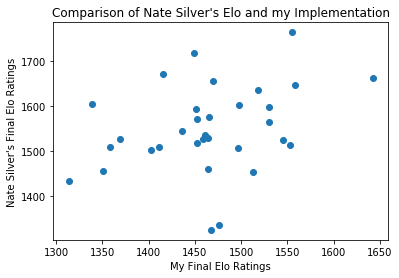

In [79]:
SSE=0
my_scores=[]
nate_scores=[]
for team,rating in m.ratings.items():
    nate_final_rating=full_df[full_df['fran_id']==team]['elo_n'].iloc[-1]
    my_scores.append(rating)
    nate_scores.append(nate_final_rating)
plt.scatter(my_scores, nate_scores)
plt.ylabel("Nate Silver's Final Elo Ratings")
plt.xlabel("My Final Elo Ratings")
plt.title("Comparison of Nate Silver's Elo and my Implementation")

In [62]:
class HeadToHeadModel(object):
    def __init__(self, events, update_function, prediction_function=None):
        self.update_function=update_function
        self.events=events
        self.ratings={}
        self.prediction_function = prediction_function
        self.predictions = []
        self.curr_season=defaultdict(lambda: self.events[0][1]['year_id'])

    def train(self):
        for idx, event in self.events:
            new_year=event['year_id']
            label_i=event['fran_id']
            label_j=event['opp_fran']
            if self.ratings.get(label_i,False)==False:
                self.ratings[label_i]=elo_lookup(label_i,event['gameorder'])
            if self.ratings.get(label_j,False)==False:
                self.ratings[label_j]=elo_lookup(label_j,event['gameorder'])
            
            if self.curr_season[label_i]!=new_year:
                self.curr_season[label_i]=new_year
                self.ratings[label_i]=self.ratings[label_i]*.66+1505.*.33
            elif self.curr_season[label_j]!=new_year:
                self.curr_season[label_j]=new_year
                self.ratings[label_j]=self.ratings[label_j]*.66+1505.*.33
            self.predictions.append(elo_prediction(self.ratings[label_i]+65, self.ratings[label_j]))
            

    def power_rankings(self):
        from operator import itemgetter
        power_rankings = sorted(self.ratings.items(), key=itemgetter(1), reverse=True)
        power = []
        for i, x in enumerate(power_rankings):
            power.append((i + 1, x))
        return power
STARTING_LOC=0
m=HeadToHeadModel(list(full_df[full_df['gameorder']>STARTING_LOC].iterrows()), silver_elo_update, elo_prediction)
m.train()
m.power_rankings()

[(1, ('Steelers', 1470.7635545414153)),
 (2, ('Eagles', 1470.3153585382165)),
 (3, ('Colts', 1469.1491542835447)),
 (4, ('Ravens', 1469.0857653161984)),
 (5, ('Patriots', 1468.7538187875393)),
 (6, ('Giants', 1467.7369768328624)),
 (7, ('Titans', 1467.4616548722802)),
 (8, ('Chargers', 1467.249230914581)),
 (9, ('Vikings', 1466.934413590523)),
 (10, ('Cowboys', 1466.3531662178254)),
 (11, ('Cardinals', 1465.6107188464116)),
 (12, ('Panthers', 1464.4958476539368)),
 (13, ('Falcons', 1464.3893629170523)),
 (14, ('Jets', 1464.0089200097607)),
 (15, ('Saints', 1463.8268812971664)),
 (16, ('Bears', 1463.3201514196453)),
 (17, ('Texans', 1463.1729711839307)),
 (18, ('Packers', 1463.0093709145062)),
 (19, ('Dolphins', 1462.6044888872736)),
 (20, ('Redskins', 1462.0401525127495)),
 (21, ('Buccaneers', 1461.9887103473386)),
 (22, ('49ers', 1461.7060784714167)),
 (23, ('Broncos', 1461.4134636514123)),
 (24, ('Jaguars', 1460.600699258562)),
 (25, ('Bengals', 1460.255605792613)),
 (26, ('Bills', 1

In [63]:
full_df['prediction']=m.predictions
full_df['predictedWinner']=full_df['prediction'].apply(lambda x: 1 if x>=.5 else 0)
full_df['winner']=full_df.apply(lambda x: x['home_score']>=x['away_score'],axis=1)

In [64]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(full_df['winner'],full_df['predictedWinner'])
conf_matrix

array([[ 105,  799],
       [  73, 1159]])

In [65]:
success_rate=np.trace(conf_matrix)/(np.sum(conf_matrix))
success_rate

0.5917602996254682

In [66]:
matchups.head(5)

,gameorder,date,year_id,game_id,away,opp_fran,away_conference,away_div,fran_id,home,home_conference,home_div
0,1,9/6/2018,2019,1ATLPHI,ATL,Falcons,NFC,South,Eagles,PHI,NFC,East
1,1,9/9/2018,2019,1PITCLE,PIT,Steelers,AFC,North,Browns,CLE,AFC,North
2,1,9/9/2018,2019,1CININD,CIN,Bengals,AFC,North,Colts,IND,AFC,South
3,1,9/9/2018,2019,1TENMIA,TEN,Titans,AFC,South,Dolphins,MIA,AFC,East
4,1,9/9/2018,2019,1SFMIN,SF,49ers,NFC,West,Vikings,MIN,NFC,North


In [67]:
class HeadToHeadModel(object):
    def __init__(self, events, update_function, prediction_function=None):
        self.update_function=update_function
        self.events=events
        self.ratings={}
        self.prediction_function = prediction_function
        self.predictions = []
        self.curr_season=defaultdict(lambda: self.events[0][1]['year_id'])

    def train(self):
        for idx, event in self.events:
            new_year=event['year_id']
            label_i=event['fran_id']
            label_j=event['opp_fran']
            if self.ratings.get(label_i,False)==False:
                self.ratings[label_i]=elo_lookup(label_i,event['gameorder'])
            if self.ratings.get(label_j,False)==False:
                self.ratings[label_j]=elo_lookup(label_j,event['gameorder'])
                
            if self.curr_season[label_i]!=new_year:
                self.curr_season[label_i]=new_year
                self.ratings[label_i]=self.ratings[label_i]*.75+1505.*.25
            elif self.curr_season[label_j]!=new_year:
                self.curr_season[label_j]=new_year
                self.ratings[label_j]=self.ratings[label_j]*.75+1505.*.25
            #todo change below to just use event
            self.predictions.append(score_prediction(self.ratings[label_i]+65, self.ratings[label_j]))
            update=self.update_function(event['home_score'],event['away_score'], self.ratings[label_i], self.ratings[label_j])
            self.ratings[label_i]+=update[0]
            self.ratings[label_j]+=update[1]

    def power_rankings(self):
        from operator import itemgetter
        power_rankings = sorted(self.ratings.items(), key=itemgetter(1), reverse=True)
        power = []
        for i, x in enumerate(power_rankings):
            power.append((i + 1, x))
        return power

[]